In [5]:
## <center>Exploratory Data Analysis</center>
import pandas as pd
import matplotlib.pyplot as plt

In [6]:


df = pd.read_csv('./student_habits_performance.csv')
print(df.columns)
print(df.shape)
print(df.values)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')
(1000, 16)
[['S1000' 23 'Female' ... 8 'Yes' 56.2]
 ['S1001' 20 'Female' ... 8 'No' 100.0]
 ['S1002' 21 'Male' ... 1 'No' 34.3]
 ...
 ['S1997' 20 'Male' ... 9 'Yes' 64.4]
 ['S1998' 24 'Male' ... 1 'No' 69.7]
 ['S1999' 19 'Female' ... 8 'No' 74.9]]


In [7]:
df['exercise_frequency'].unique()

array([6, 1, 4, 3, 2, 0, 5])

In [8]:

df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [9]:
object_cols = df.select_dtypes(include=['object'])
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

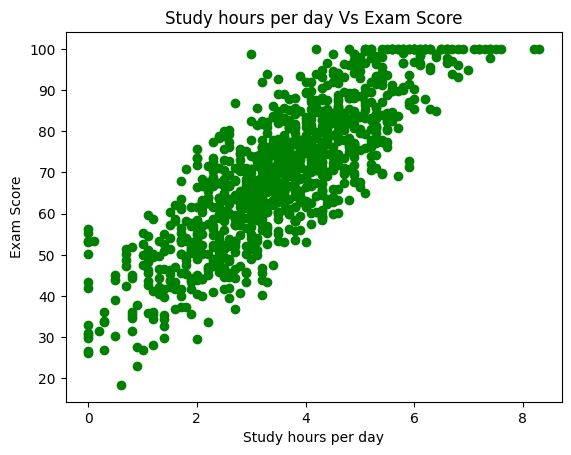

In [10]:

df.dtypes

#Shows high correlation between study_hour_per_day and exam_score
plt.scatter(df['study_hours_per_day'],df['exam_score'],c='green')
plt.xlabel("Study hours per day")
plt.ylabel("Exam Score")
plt.title("Study hours per day Vs Exam Score")
plt.show()


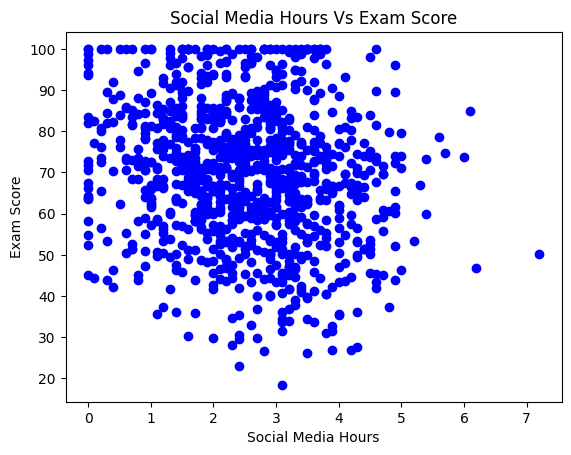

In [11]:
#Shows high correlation between study_hour_per_day and exam_score
plt.scatter(df['social_media_hours'],df['exam_score'],c='blue')
plt.xlabel("Social Media Hours")
plt.ylabel("Exam Score")
plt.title("Social Media Hours Vs Exam Score")
plt.show()

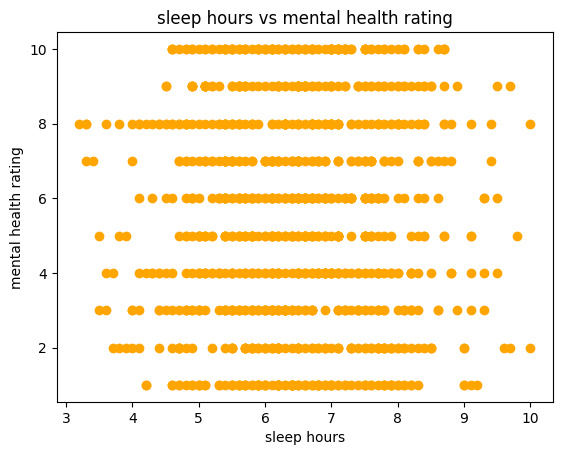

In [12]:

plt.scatter(df['sleep_hours'],df['mental_health_rating'],c='orange')
plt.xlabel("sleep hours")
plt.ylabel("mental health rating")
plt.title("sleep hours vs mental health rating")
plt.show()

In [13]:
#droppable feature: student_id
df.drop(columns=['student_id'],inplace=True)

In [43]:
df['mental_health_rating'].unique()

array([ 8,  1,  4, 10,  3,  9,  7,  5,  2,  6])

In [14]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0})
df['parental_education_level'] = df['parental_education_level'].fillna("None")

df['parental_education_level'] = df['parental_education_level'].map({
    "High School": 1,
    "Bachelor": 2,
    "Master": 3
})
df=df.replace({'Yes':1, 'No':0})
df['internet_quality'] = df['internet_quality'].map({'Poor':0, 'Average':1, 'Good':2})
df['diet_quality'] = df['diet_quality'].map({'Poor':0, 'Fair':1, 'Good':2})

C:\Users\bisha\AppData\Local\Temp\ipykernel_16964\3730856720.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'Yes':1, 'No':0})


In [15]:
df.shape

(1000, 15)

In [16]:
df.fillna(df.mean(numeric_only=True), inplace=True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
import numpy as np
np.corrcoef(df['sleep_hours'],df['mental_health_rating'])
print(df.values)
print(df.columns)
print(df.shape)

[[ 23.    0.    0.  ...   8.    1.   56.2]
 [ 20.    0.    6.9 ...   8.    0.  100. ]
 [ 21.    1.    1.4 ...   1.    0.   34.3]
 ...
 [ 20.    1.    3.  ...   9.    1.   64.4]
 [ 24.    1.    5.4 ...   1.    0.   69.7]
 [ 19.    0.    4.3 ...   8.    0.   74.9]]
Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')
(1000, 15)


In [17]:



df.head()
X = df.drop(columns=['exam_score'])
y = df['exam_score']

In [18]:
print(X.shape)
print(y.shape)

(1000, 14)
(1000,)


In [37]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)
rf = RandomForestRegressor(random_state=42)
# rf = LinearRegression()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [38]:

print(y_pred)
def regression_report(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np

    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE  : {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R2   : {r2_score(y_true, y_pred):.4f}")



[67.105 90.517 78.492 72.172 56.597 61.818 67.515 58.614 47.336 75.379
 36.215 97.888 54.804 77.501 42.45  60.189 73.753 67.219 71.1   50.503
 54.588 65.26  45.721 81.776 70.442 70.787 68.416 50.527 70.517 72.145
 70.692 76.938 65.596 86.302 62.689 49.1   67.231 55.923 62.584 97.666
 44.734 95.42  65.288 63.513 92.57  92.18  56.109 78.852 60.096 63.219
 66.401 45.694 74.254 75.091 43.621 75.028 72.903 73.745 63.254 47.668
 87.095 71.336 82.4   49.757 69.101 52.362 69.517 95.338 56.996 76.547
 60.543 65.543 44.297 52.81  75.865 74.636 96.06  76.67  84.545 73.457
 68.222 73.009 72.499 55.419 61.257 64.555 76.555 81.639 64.808 38.77
 96.112 49.675 55.649 52.408 67.241 77.786 95.182 70.959 79.991 77.647
 62.098 72.411 64.892 66.206 50.111 39.655 57.659 57.272 52.098 79.273
 72.235 78.361 83.084 86.727 75.99  79.336 88.646 46.349 73.989 87.37
 46.973 79.32  89.964 80.48  55.772 57.559 73.7   63.429 79.87  79.019
 85.443 91.266 35.341 71.725 58.712 88.704 79.66  65.632 75.381 74.58
 76.783 9

In [39]:
regression_report(y_test, y_pred)

MAE  : 5.0750
MSE  : 42.3928
RMSE : 6.5110
R2   : 0.8427


In [40]:
#saving the trained model
import pickle

In [41]:
filename = "trained_model.sav"
pickle.dump(rf,open(filename,'wb')) #rf-> model name, filename-> name of file, wb -> file operation mode write in binary

In [42]:
#loading the saved model
loaded_model = pickle.load( open('trained_model.sav', 'rb') )